In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import svd, eigh
from numpy.linalg import inv, LinAlgError

## Problem 1

In [101]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Fintech545_HW2/DailyReturn.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2021/10/21,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
1,2021/10/22,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2,2021/10/25,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
3,2021/10/26,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
4,2021/10/27,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786


In [102]:
# Remove the first row and first column
data = df.iloc[:, 1:]
data.head()

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,-0.002330,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
1,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,0.008437,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,0.003527,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
3,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,0.002033,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
4,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,-0.010555,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786


In [103]:
# Define the exponential weighting factor
lambda_value = 0.97

# Initialize the covariance matrix with zeros
ewcov = np.zeros((len(data.columns), len(data.columns)))

# Loop through each asset
for i in range(len(data.columns)):
    for j in range(i, len(data.columns)):
        # Calculate the weights
        weights = [(1 - lambda_value) * (lambda_value ** (k - 1)) for k in range(1, len(data) + 1)]
        weights = np.array(weights) / np.sum(weights)
        weights = sorted(weights)
        
        # Calculate the mean of each asset
        mean_i = data.iloc[:, i].mean()
        mean_j = data.iloc[:, j].mean()
        
        # Calculate the weighted covariance
        ewcov[i][j] = (weights * ((data.iloc[:, i] - mean_i) * (data.iloc[:, j] - mean_j))).sum()
        ewcov[j][i] = ewcov[i][j]

print(ewcov)

[[8.41106909e-05 1.06945662e-04 1.21760871e-04 ... 1.25484463e-04
  8.11331555e-05 8.61130395e-05]
 [1.06945662e-04 2.68752303e-04 1.97531665e-04 ... 1.15658764e-04
  3.74977522e-05 8.22220854e-05]
 [1.21760871e-04 1.97531665e-04 2.91157502e-04 ... 8.30278956e-05
  3.31844912e-05 7.34713753e-05]
 ...
 [1.25484463e-04 1.15658764e-04 8.30278956e-05 ... 7.47889224e-04
  2.68371109e-04 2.00639601e-04]
 [8.11331555e-05 3.74977522e-05 3.31844912e-05 ... 2.68371109e-04
  3.08241679e-04 8.21009546e-05]
 [8.61130395e-05 8.22220854e-05 7.34713753e-05 ... 2.00639601e-04
  8.21009546e-05 2.62692778e-04]]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex

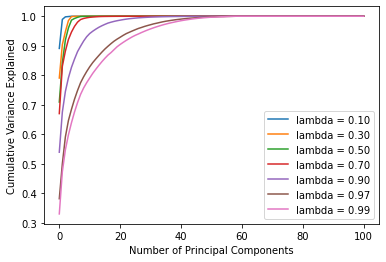

In [104]:
def plot_cumulative_variance(cov_matrix, lambdas):
    pca_results = []
    for lambda_ in lambdas:
        weighted_cov = np.zeros_like(cov_matrix)
        for i in range(weighted_cov.shape[0]):
            for j in range(weighted_cov.shape[1]):
                weighted_cov[i,j] = (1-lambda_) * (lambda_**(i-1)) * cov_matrix[i,j]
        eig_vals, eig_vecs = np.linalg.eig(weighted_cov)
        total_var = sum(eig_vals)
        cum_var = np.cumsum(eig_vals) / total_var
        pca_results.append((lambda_, cum_var))

    fig, ax = plt.subplots()
    for lambda_, cum_var in pca_results:
        ax.plot(cum_var, label="lambda = {:.2f}".format(lambda_))
    ax.legend()
    ax.set_xlabel("Number of Principal Components")
    ax.set_ylabel("Cumulative Variance Explained")
    plt.show()

cov_matrix = ewcov
lambdas = [0.1, 0.3, 0.5, 0.7, 0.9, 0.97, 0.99]
plot_cumulative_variance(cov_matrix, lambdas)

##Problem 2

In [105]:
def chol_psd(A):
  n = A.shape[1]
  root = np.zeros((n,n))
  
  # loop over columns
  for i in range(n):
    s = 0.0
    if i > 0:
      s = root[i][:i].T @ root[i][:i]
    
    # Diagonal Element
    temp = A[i][i] - s
    if temp <= 0 and temp >= -1e-8:
      temp = 0.0
    root[i][i] = np.sqrt(temp)

    # check for the 0 eign value. set the column to 0 if we have one
    if root[i][i] == 0.0:
      root[i][(i+1):n] = 0.0
    else:
      # update off diagonal rows of the column
      ir = 1.0/root[i][i]
      for j in np.arange(i+1,n):
        s = root[j][:i].T @ root[i][:i]
        root[j][i] = (A[j][i] -s) * ir
  return root

In [106]:
n = 5
a = np.ones((n,n)) * 0.9
for i in range(n):
  a[i,i] = 1.0
a[0,1] = 1.0
a[1,0] = 1.0

chol_psd(a)
#nearest_psd(a)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.9       , 0.        , 0.43588989, 0.        , 0.        ],
       [0.9       , 0.        , 0.20647416, 0.38388595, 0.        ],
       [0.9       , 0.        , 0.20647416, 0.12339191, 0.36351459]])

In [107]:
#near_psd
def near_psd(a, epsilon=0.0):
  n = a.shape[0]


  invSD = None
  out = a.copy()

  #calculate the correlation matrix if we got a covariance
  if (np.count_nonzero(np.diag(out) == 1.0) != n):
      invSD = np.diag(1.0 / np.sqrt(np.diag(out)))
      out = np.dot(np.dot(invSD, out), invSD)

  #SVD, update the eigen value and scale
  vals, vecs = np.linalg.eigh(out)
  vals = np.maximum(vals, epsilon)
  T = 1.0 / (np.dot(np.dot(vecs, np.diag(vals)), vecs.T))
  T = np.diag(np.sqrt(np.diag(T)))
  l = np.diag(np.sqrt(vals))
  B = np.dot(np.dot(T, vecs), l)
  out = np.dot(B, B.T)

  #Add back the variance
  if invSD is not None:
      invSD = np.diag(1.0 / np.diag(invSD))
      out = np.dot(np.dot(invSD, out), invSD)
  return out

In [108]:
#near_psd test
n = 500
a = np.ones((n,n)) * 0.9
for i in range(n):
  a[i,i] = 1.0
a[0,1] = 0.7357
a[1,0] = 0.7357

near_psd(a)

array([[1.        , 0.74381947, 0.88594237, ..., 0.88594237, 0.88594237,
        0.88594237],
       [0.74381947, 1.        , 0.88594237, ..., 0.88594237, 0.88594237,
        0.88594237],
       [0.88594237, 0.88594237, 1.        , ..., 0.90000005, 0.90000005,
        0.90000005],
       ...,
       [0.88594237, 0.88594237, 0.90000005, ..., 1.        , 0.90000005,
        0.90000005],
       [0.88594237, 0.88594237, 0.90000005, ..., 0.90000005, 1.        ,
        0.90000005],
       [0.88594237, 0.88594237, 0.90000005, ..., 0.90000005, 0.90000005,
        1.        ]])

In [109]:
#Higham
def nearest_psd_correlation(A, num_iter):
  while num_iter > 0:
    eigvals, eigvecs = eigh(A)
    neg = 0
    for e in eigvals:
      if e < 0:
        #n = A.shape[0]
        D = np.diag(np.maximum(eigvals, 0))
        V = eigvecs @ np.sqrt(D)
        A = V @ V.T
        neg+=1
        break
    if neg == 0:
      break
    num_iter -= 1

  return (A + A.T) / 2

In [110]:
#Higham test
nearest_psd_correlation(a, 10)

array([[1.03169433, 0.76739433, 0.89987276, ..., 0.89987276, 0.89987276,
        0.89987276],
       [0.76739433, 1.03169433, 0.89987276, ..., 0.89987276, 0.89987276,
        0.89987276],
       [0.89987276, 0.89987276, 1.00000051, ..., 0.90000051, 0.90000051,
        0.90000051],
       ...,
       [0.89987276, 0.89987276, 0.90000051, ..., 1.00000051, 0.90000051,
        0.90000051],
       [0.89987276, 0.89987276, 0.90000051, ..., 0.90000051, 1.00000051,
        0.90000051],
       [0.89987276, 0.89987276, 0.90000051, ..., 0.90000051, 0.90000051,
        1.00000051]])

In [111]:
#Confirm PSD
chol_psd(near_psd(a))

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.43819469e-01,  6.68380578e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.85942373e-01,  3.39568795e-01,  3.15910028e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.85942373e-01,  3.39568795e-01, -6.35633859e-04, ...,
         2.58198824e-01,  0.00000000e+00,  0.00000000e+00],
       [ 8.85942373e-01,  3.39568795e-01, -6.35633859e-04, ...,
        -1.29099412e-01,  2.23606741e-01,  0.00000000e+00],
       [ 8.85942373e-01,  3.39568795e-01, -6.35633859e-04, ...,
        -1.29099412e-01, -2.23606741e-01,  0.00000000e+00]])

In [112]:
chol_psd(nearest_psd_correlation(a, 10))

array([[ 1.01572355e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.55514950e-01,  6.78889892e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.85942599e-01,  3.39568881e-01,  3.15910109e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.85942599e-01,  3.39568881e-01, -6.35634022e-04, ...,
         2.58198890e-01,  0.00000000e+00,  0.00000000e+00],
       [ 8.85942599e-01,  3.39568881e-01, -6.35634022e-04, ...,
        -1.29099445e-01,  2.23606798e-01,  0.00000000e+00],
       [ 8.85942599e-01,  3.39568881e-01, -6.35634022e-04, ...,
        -1.29099445e-01, -2.23606798e-01,  1.99764502e-06]])

In [113]:
#Frobenius norm
def Frobenius(A):
  return np.linalg.norm(A, ord='fro')

Frobenius(a)

450.10494610591377

In [114]:
Frobenius(near_psd(a))

450.0494394140364

In [115]:
Frobenius(nearest_psd_correlation(a, 10))
#Even when n is large, highman is still more accurate

450.10494160642054

In [116]:
#large N
n = 5000
a = np.ones((n,n)) * 0.9
for i in range(n):
  a[i,i] = 1.0
a[0,1] = 0.7357
a[1,0] = 0.7357

In [117]:
#run time
import time
start = time.time()
near = near_psd(a)
node1 = time.time()
hig = nearest_psd_correlation(a, 10)
node2 = time.time()

print("Run time of near_psd is:", node1-start)
print("Run time of highman is:", node2-node1)
print("Their difference is:", node2-2*node1+start)

Run time of near_psd is: 91.81546473503113
Run time of highman is: 94.02158880233765
Their difference is: 2.2061240673065186


## Problem 3

In [118]:
def exponential_weighted_variance(data, lambd):
    n_rows, n_cols = data.shape
    weight = np.zeros(n_rows)
    for i in range(n_rows):
        weight[i] = (1 - lambd) * (lambd ** (n_rows - i - 1))

    variance_vector = np.zeros((n_cols,1))
    for j in range(n_cols):
      mean = np.mean(data.iloc[:, j])
      variance = 0
      for i in range(n_rows):
        deviation = data.iloc[i,j] - mean
        variance += (weight[i] * deviation**2)
      variance_vector[j] = variance
    return variance_vector

In [119]:
def exponential_weighted_correlation(cov, var):
  std_vector = np.sqrt(var)

  corr = cov / np.outer(std_vector, std_vector)
  return corr

In [120]:
def generate_covariance_matrix(correlation_matrix, variance_vector):
    return np.array(np.outer(np.sqrt(variance_vector), np.sqrt(variance_vector)) * correlation_matrix)

In [121]:
#1
lambda_value = 0.0
var = exponential_weighted_variance(data, lambda_value)
cor = data.corr()

In [122]:
cov1 = generate_covariance_matrix(cor, var)

In [123]:
#2
lambda_value = 0.97
var_weighted = exponential_weighted_variance(data, lambda_value)
cor = data.corr()

In [124]:
cov2 = generate_covariance_matrix(cor, var_weighted)

In [125]:
#3
lambda_value = 0.0
var = np.var(data, axis=0)
cor_weighted = exponential_weighted_correlation(ewcov, var)

In [126]:
cov3 = generate_covariance_matrix(cor, var)

In [127]:
#4
lambda_value = 0.97
var_weighted = exponential_weighted_variance(data, lambda_value)
cor_weighted = exponential_weighted_correlation(ewcov, var_weighted)

In [128]:
cov4 = generate_covariance_matrix(cor_weighted, var_weighted)

In [129]:
def direct_simulation(cov, num):
  result = chol_psd(cov) @ np.random.standard_normal(size=(len(cov), num))
  return result

num = 25000

In [130]:
Frobenius(np.cov(data, rowvar=False))

0.011968397602104986

In [131]:
d_cov1 = np.cov(direct_simulation(cov1, num))
d_cov2 = np.cov(direct_simulation(cov2, num))
d_cov3 = np.cov(direct_simulation(cov3, num))
d_cov4 = np.cov(direct_simulation(cov4, num))

In [132]:
print(Frobenius(d_cov1))
print(Frobenius(d_cov2))
print(Frobenius(d_cov3))
print(Frobenius(d_cov4))

0.01357834736756668
0.010063694016827716
0.011788343591917282
0.012796420482215224


In [133]:
def simulate_pca(a, nsim, perc):
    # Eigenvalue decomposition
    vals, vecs = np.linalg.eig(a)

    # flip the eigenvalues and the vectors
    flip = np.argsort(vals)[::-1]
    vals = vals[flip]
    vecs = vecs[:, flip]

    tv = np.sum(vals)
    start = 0
    while (np.abs(np.sum(vals[:start])/tv) <perc):
      start+=1
    vals = vals[:start]
    vecs = vecs[:, :start]
    print("Simulating with", start, "PC Factors: {:.2f}".format(np.abs(sum(vals)/tv*100)), "% total variance explained")
    B = np.matmul(vecs, np.diag(np.sqrt(vals)))
    m = B.shape[1]
    r = np.random.randn(m,nsim)
    return np.matmul(B, r)

In [134]:
pca100_cov1 = np.cov(simulate_pca(cov1, num, 1))

Simulating with 59 PC Factors: 100.00 % total variance explained


In [135]:
pca100_cov2 = np.cov(simulate_pca(cov2, num, 1))

Simulating with 72 PC Factors: 100.00 % total variance explained


In [136]:
pca100_cov3 = np.cov(simulate_pca(cov3, num, 1))

Simulating with 96 PC Factors: 100.00 % total variance explained


In [137]:
pca100_cov4 = np.cov(simulate_pca(cov4, num, 1))

Simulating with 59 PC Factors: 100.00 % total variance explained


In [138]:
print(Frobenius(pca100_cov1))
print(Frobenius(pca100_cov2))
print(Frobenius(pca100_cov3))
print(Frobenius(pca100_cov4))

0.013461787317309947
0.010071476963148546
0.01183368497059213
0.012803174926308173


In [139]:
pca75_cov1 = np.cov(simulate_pca(cov1, num, 0.75))

Simulating with 7 PC Factors: 77.22 % total variance explained


In [140]:
pca75_cov2 = np.cov(simulate_pca(cov2, num, 0.75))

Simulating with 12 PC Factors: 76.57 % total variance explained


In [141]:
pca75_cov3 = np.cov(simulate_pca(cov3, num, 0.75))

Simulating with 12 PC Factors: 76.12 % total variance explained


In [142]:
pca75_cov4 = np.cov(simulate_pca(cov4, num, 0.75))

Simulating with 10 PC Factors: 76.76 % total variance explained


In [143]:
print(Frobenius(pca75_cov1))
print(Frobenius(pca75_cov2))
print(Frobenius(pca75_cov3))
print(Frobenius(pca75_cov4))

0.01358175132489859
0.009913226482298901
0.011545249770079943
0.01245550914926372


In [144]:
pca50_cov1 = np.cov(simulate_pca(cov1, num, 0.50))

Simulating with 2 PC Factors: 54.77 % total variance explained


In [145]:
pca50_cov2 = np.cov(simulate_pca(cov2, num, 0.50))

Simulating with 4 PC Factors: 54.55 % total variance explained


In [146]:
pca50_cov3 = np.cov(simulate_pca(cov3, num, 0.50))

Simulating with 4 PC Factors: 53.63 % total variance explained


In [147]:
pca50_cov4 = np.cov(simulate_pca(cov4, num, 0.50))

Simulating with 3 PC Factors: 54.04 % total variance explained


In [148]:
print(Frobenius(pca50_cov1))
print(Frobenius(pca50_cov2))
print(Frobenius(pca50_cov3))
print(Frobenius(pca50_cov4))

0.012946793685218238
0.009659137643099057
0.01138038064107553
0.012285894366920498
